In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
data=load_iris()

In [4]:
X=data.data
y=data.target

In [5]:
#creat dataframe for easy analysis 
data=pd.DataFrame(X,columns=data.feature_names)

In [6]:
data['species']=y

C:\Users\Master\AppData\Local\Temp\ipykernel_10600\2522360005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=data, palette='pastel')


Text(0.5, 1.0, 'Class ditribution')

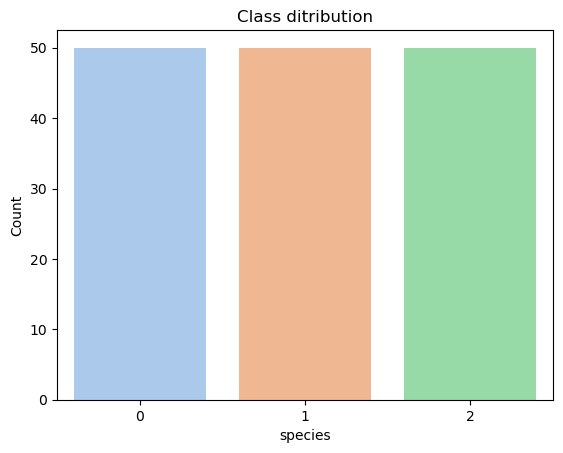

In [7]:
#check balance 
sns.countplot(x='species', data=data, palette='pastel')
plt.xlabel('species')
plt.ylabel('Count')
plt.title('Class ditribution')

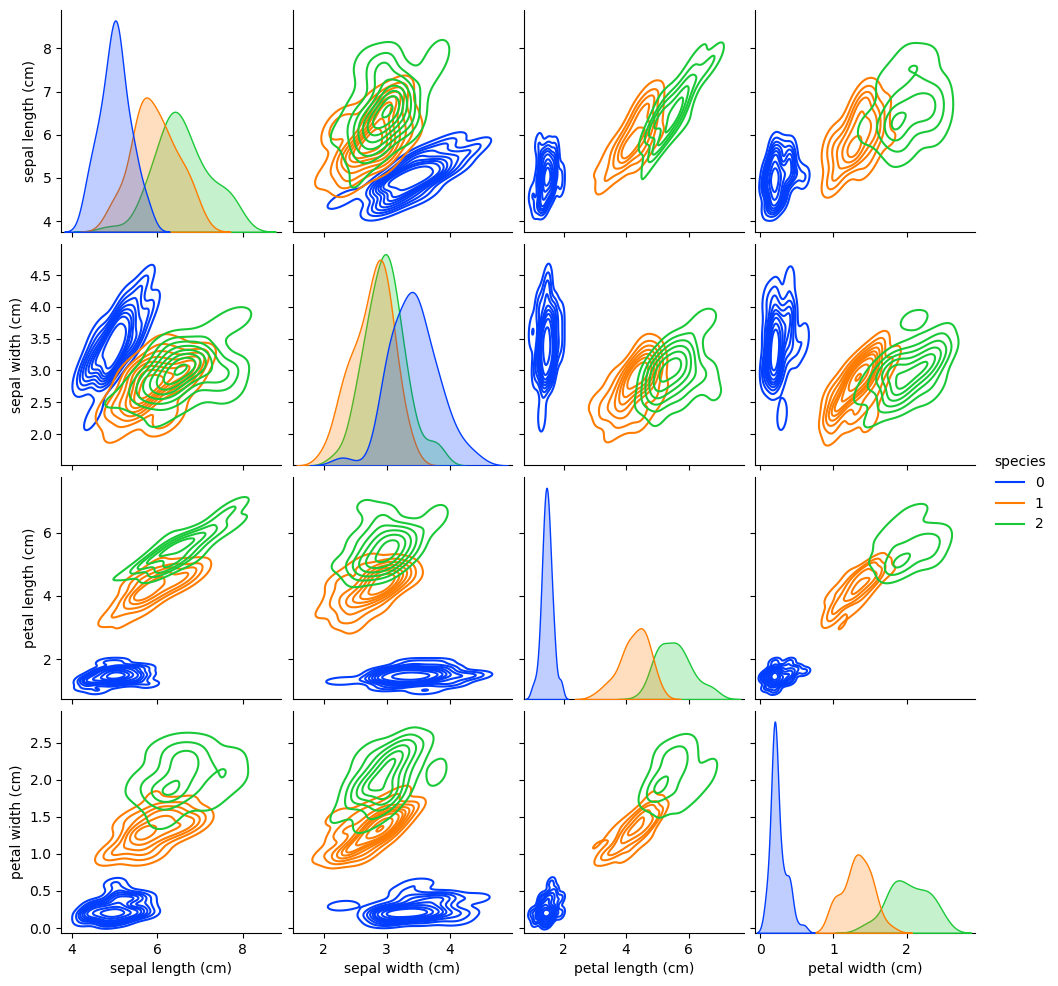

In [8]:
sns.pairplot(data,hue='species', palette='bright',kind='kde')

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [10]:
Scaler=StandardScaler()

In [11]:
X_train_scale=Scaler.fit_transform(X_train)
X_test_scale=Scaler.transform(X_test)

In [12]:
#logisticRegression
log_reg=LogisticRegression(max_iter=200)
log_reg.fit(X_train_scale,y_train)

LogisticRegression(max_iter=200)

In [13]:
y_pred=log_reg.predict(X_test_scale)

In [14]:
print('logistic regression report:',classification_report(y_test,y_pred))

logistic regression report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
knn=KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train_scale,y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred_knn=knn.predict(X_test_scale)

In [17]:
print("Classification_report:",classification_report(y_test,y_pred))

Classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



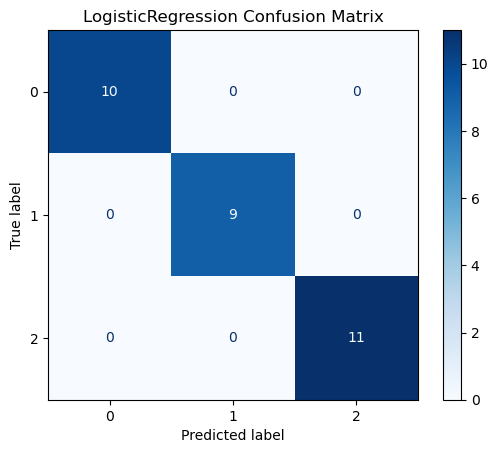

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_reg,X_test_scale,y_test,cmap='Blues')
plt.title('LogisticRegression Confusion Matrix')
plt.show()

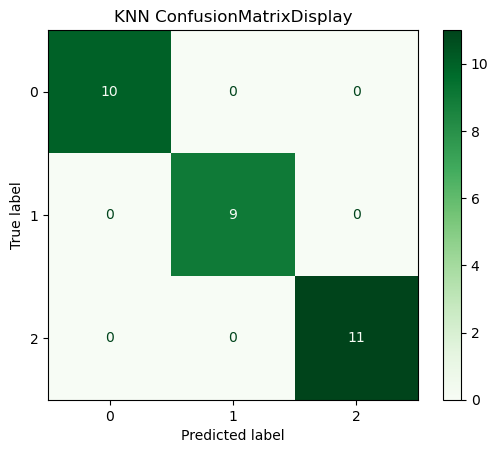

In [19]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_scale, y_test, cmap='Greens')
plt.title('KNN ConfusionMatrixDisplay')
plt.show()        

In [20]:
import pickle

In [21]:
model=LogisticRegression()

In [22]:
model.fit(X_train_scale,y_train)

LogisticRegression()

In [23]:
with open("iris_model.pkl",'wb')as f:
    pickle.dump(model,f)
with open("Scaler.pkl",'wb')as f:
    pickle.dump(Scaler,f)

In [24]:
from flask import Flask,request,jsonify
with open('iris_model.pkl','rb') as f:
    model=pickle.load(f)
with open('Scaler.pkl','rb')as f:
    Scaler=pickle.load(f)

In [ ]:
app=Flask(__name__)
@app.route('/')
def home():
    return "🌸 Iris Model is up and running"
@app.route('/predict',methods=['POST'])
def predict():
    data=request.get_json(force=True)
    # Expecting input like: {"data": [5.1, 3.5, 1.4, 0.2]}
    input_features = np.array(data['data']).reshape(1, -1)
    input_scaled = scaler.transform(input_features)
    
    prediction = model.predict(input_scaled)
    
    # Map numeric label to class name
    classes = ['setosa', 'versicolor', 'virginica']
    output = classes[prediction[0]]

    return jsonify({"prediction": output})

if __name__ == '__main__':
    app.run(debug=True,use_reloader=False)
threading.Thread(target=run_app).start()

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
